<a href="https://colab.research.google.com/github/silvajoel/Client-Server/blob/main/DNN_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Conjunto de dados de classificação de dígitos manuscritos MNIST**


O conjunto de dados MNIST é um acrônimo que significa o conjunto de dados do Instituto Nacional de Padrões e Tecnologia Modificado.

É um conjunto de dados de 60.000 pequenas imagens quadradas de 28 × 28 pixels em tons de cinza de dígitos manuscritos entre 0 e 9.

A tarefa é classificar uma determinada imagem de um dígito manuscrito em uma das 10 classes que representam valores inteiros de 0 a 9, inclusive.

É um conjunto de dados amplamente utilizado e profundamente compreendido e, na maioria das vezes, está “ resolvido ”. Os modelos de melhor desempenho são redes neurais convolucionais de aprendizado profundo que atingem uma precisão de classificação acima de 99%, com uma taxa de erro entre 0,4% e 0,2% no conjunto de dados de teste de espera.

O exemplo abaixo carrega o conjunto de dados MNIST usando a API Keras e cria um gráfico das primeiras nove imagens no conjunto de dados de treinamento.


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
# import required modules
import tensorflow as tf
import tensorflow_datasets as tfds


(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
# Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

11501568/11490434 [==============================] - 0s 0us/step
5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


No conjunto de dados MNIST, as imagens são um tensor na forma de [60000, 28, 28]. A primeira
dimensão é usada para extrair imagens e a segunda e terceira dimensões são usadas para extrair
pixels em cada imagem. Cada elemento neste tensor indica a força de um pixel em uma imagem.
O valor varia de 0 a 255.
Os dados do rótulo são convertidos de vetores escalares para vetores one-hot. Em um vetor onehot, um dígito é 1 e dígitos em outras dimensões são todos 0s. Por exemplo, o rótulo 1 pode ser
representado como
[0,1,0,0,0,0,0,0,0,0,0]. Portanto, os rótulos são uma matriz digital de [60000, 10].

# **Dataset - Preprocessamento e Visualização**

**Data - Visualização**

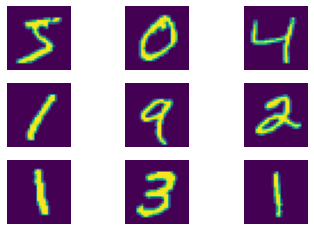

In [2]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i])
  #plt.ylabel(y[i].numpy())
  plt.axis('off')
plt.show()

Processamento de dados: A saída de uma rede totalmente conectada deve estar na forma
vetorial, ao invés da forma matricial das imagens atuais. Portanto, você precisa classificar as
imagens em vetores.

In [3]:
# Convert a 28 x 28 image to a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)


Atualmente, o intervalo dinâmico de pixels é de 0 a 255. Os pixels de imagem são normalmente
normalizados para o intervalo de 0 a 1 durante o processamento de valores de pixel de imagem.


In [4]:
# Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# **DNN Construção**
**Construindo um Modelo DNN**

In [5]:
# Create a deep neural network (DNN) model that consists of three fully connected layers and two ReLU activation
#functions.
model = keras.Sequential([
layers.Dense(512, activation='relu', input_dim = 784), #784 = 28x28 números de pixels  #Funções de ativação para teste = relu, sigmoid, softplus, softmax, elu, exponential
layers.Dense(256, activation='relu'),
layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')]) #Função de ativação da camada de saída
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


layer.Dense() indica uma camada totalmente conectada e activation indica uma função de ativação usada.

# **Compilando o Modelo DNN**

In [6]:
# Adam(), Adagrad(), SGD(), RMSprop(), Adadelta(), Adamax(), Nadam(), Ftrl()
Optimizer = optimizers.Adagrad(0.006)
model.compile(loss= "categorical_crossentropy", 
optimizer = Optimizer,
metrics=['accuracy']) #categoricla para valores nao binarios
print( model.summary() )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
val_images = x_train[:10000]
partial_images = x_train[10000:]
val_labels = y_train[:10000]
partial_labels = y_train[10000:]

# **Treinando o Modelo DNN**
Para começar a treinar, chamamos o método model.fit— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [8]:
# Ajuste os dados de treinamento ao modelo usando o método de ajuste.
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = model.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 25, validation_data =(val_images, val_labels), 
                    callbacks =[earlystopping])


Epoch 1/25
391/391 [==============================] - 11s 24ms/step - loss: 0.8932 - accuracy: 0.7778 - val_loss: 0.3942 - val_accuracy: 0.8960
Epoch 2/25
391/391 [==============================] - 5s 13ms/step - loss: 0.3474 - accuracy: 0.9016 - val_loss: 0.2991 - val_accuracy: 0.9159
Epoch 3/25
391/391 [==============================] - 5s 13ms/step - loss: 0.2831 - accuracy: 0.9189 - val_loss: 0.2676 - val_accuracy: 0.9225
Epoch 4/25
391/391 [==============================] - 5s 13ms/step - loss: 0.2465 - accuracy: 0.9290 - val_loss: 0.2350 - val_accuracy: 0.9308
Epoch 5/25
391/391 [==============================] - 5s 13ms/step - loss: 0.2211 - accuracy: 0.9371 - val_loss: 0.2146 - val_accuracy: 0.9364
Epoch 6/25
391/391 [==============================] - 5s 13ms/step - loss: 0.2012 - accuracy: 0.9431 - val_loss: 0.2016 - val_accuracy: 0.9407
Epoch 7/25
391/391 [==============================] - 5s 13ms/step - loss: 0.1844 - accuracy: 0.9478 - val_loss: 0.1853 - val_accuracy: 0.945

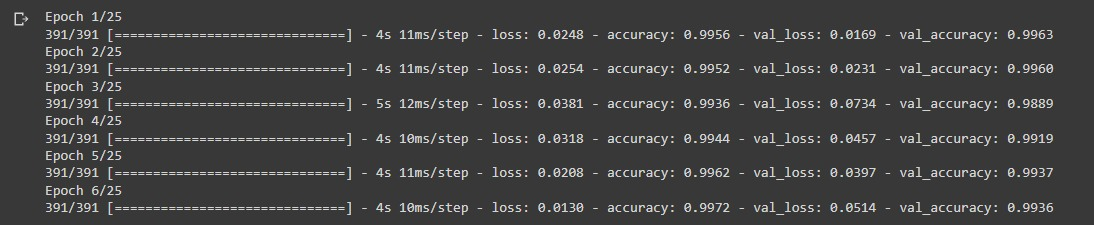

O treinamento parou na 6ª época, ou seja, o modelo começará a se ajustar a partir da 7ª época. Portanto, o número ideal de épocas para treinar a maioria dos conjuntos de dados é 6.

Observando valores de perda sem usar a função de retorno de chamada Early Stopping:
Treine o modelo até 25 épocas e plote os valores de perda de treinamento e valores de perda de validação em relação ao número de épocas. A trama se parece com:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


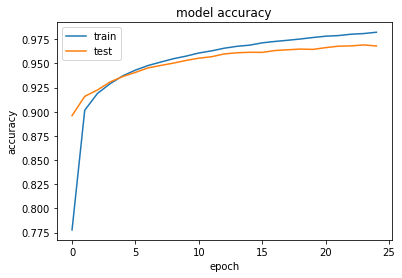

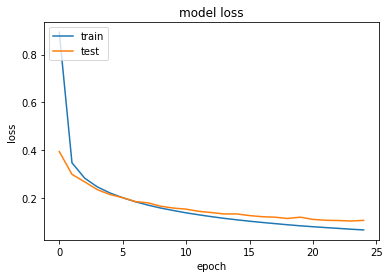

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

A partir do gráfico de precisão, podemos ver que o modelo provavelmente poderia ser treinado um pouco mais, pois a tendência de precisão em ambos os conjuntos de dados ainda está aumentando nas últimas épocas. Também podemos ver que o modelo ainda não aprendeu demais o conjunto de dados de treinamento, mostrando habilidade comparável em ambos os conjuntos de dados.

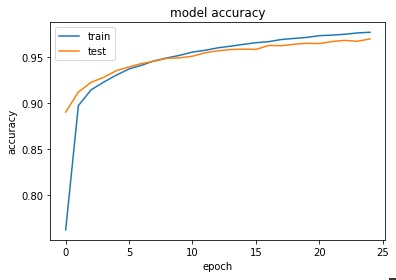

A partir do gráfico de perda, podemos ver que o modelo tem desempenho comparável nos conjuntos de dados de treinamento e validação (teste rotulado). Se esses gráficos paralelos começarem a se distanciar consistentemente, pode ser um sinal para parar de treinar em uma época anterior.

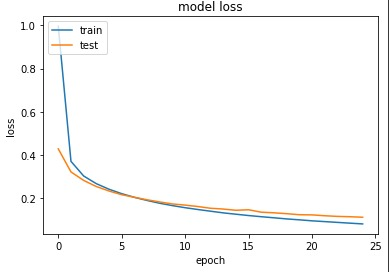

# **Testando o Modelo DNN**

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.09568025171756744
Test accuracy: 0.9715999960899353


# **Salvando o Modelo DNN**

In [11]:
logdir='./mnist_model'
if not os.path.exists(logdir):
  os.mkdir(logdir)
model.save(logdir+'/final_DNN_model.h5')

1) Uma DNN é uma rede neural artificial que consiste em mais de três camadas; ele combina o processo de extração de recursos com a classificação em um processo de aprendizado com FSVM e permite a tomada de decisões.

As redes neurais profundas oferecem muito valor aos estatísticos, principalmente no aumento da precisão de um modelo de aprendizado de máquina.Na sua forma mais simples, uma rede neural com algum nível de complexidade, geralmente pelo menos duas camadas, qualifica-se como uma rede neural profunda (DNN), ou rede profunda.

2)Uma rede neural convolucional (CNN) é um tipo de reconhecimento neural artificial usado para processar dados de pixel.

CNN são poderosos processamentos de imagem, geralmente usando visão de máquina que inclui reconhecimento de imagem e vídeo de reconhecimento, com profundos sistemas de imagem e processamento artificial (NLP).

3)Uma CNN é um tipo de DNN, enquanto DNN significa Rede Neural Profunda, CNN significa Rede Neural Convolucional. O que significa que DNNs são realmente apenas um termo genérico para várias arquiteturas de redes neurais diferentes, uma das quais é uma CNN.

DNN é uma RNA com múltiplas camadas ocultas que podem modelar relações não lineares e extrair novas características implícitas nos dados. A CNN é uma classe de Redes Neurais Artificiais profundas que se tornou cada vez mais popular para classificação de informações.

4) Classificação de imagens - motores de busca, redes sociais, sistemas de recomendação. A principal aplicação das redes neurais convolucionais é o reconhecimento e classificação de imagens. Este também é o único caso de uso em que as estruturas mais avançadas são usadas (especialmente no caso de imagens médicas).

5) Uma função de ativação em uma rede neural define como a soma ponderada da entrada é transformada em uma saída de um nó ou nós em uma camada da rede. Elas basicamente decidem se um neurônio deve ser ativado ou não. Ou seja, se a informação que o neurônio está recebendo é relevante para a informação fornecida ou deve ser ignorada.

6) ReLU uma função que efetua resultados no intervalo de 0 a infinito ([0, ∞[). Ela retorna 0 para todos os valores negativos, e o próprio valor para valores positivos. Tornou-se a função de ativação padrão para muitos tipos de redes neurais porque um modelo que a usa é mais fácil de treinar e geralmente obtém melhor desempenho.É uma função computacionalmente leve, entretanto não é centrada em zero.

7) Dropout é uma técnica de regularização para reduzir o overfitting em redes neurais artificiais, evitando co-adaptações complexas em dados de treinamento. É uma maneira eficiente de realizar a média do modelo com redes neurais. As camadas de dropout são importantes no treinamento de CNNs porque evitam o overfitting nos dados de treinamento. Se eles não estiverem presentes, o primeiro lote de amostras de treinamento influenciará o aprendizado de maneira desproporcionalmente alta.

8) O treinamento parou na 6ª época, ou seja, o modelo começará a se ajustar a partir da 7ª época. Portanto, o número ideal de épocas para treinar a maioria dos conjuntos de dados é 6.

9) Adam, Adamax, Adagrad e RMSprop.

10) O que melhor se adequou para o CNN foi o Adagrad.

11) relu, elu, softmax, sigmoid, softplus e exponential. Os que melhor se adequaram foram relu e softmax